In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.io as pio
import plotly.express as px
import warnings
warnings.simplefilter("ignore", UserWarning)

from features.utils import *
from features.athlete_profile import *

In [2]:
activities_data = loadData()
activities_data.columns

Index(['ID de l'activité', 'Date de l'activité', 'Nom de l'activité',
       'Type d'activité', 'Description de l'activité', 'Temps écoulé',
       'Mesure d'effort', 'Équipement utilisé pour l'activité',
       'Nom du fichier', 'Poids de l'athlète', 'Poids du vélo',
       'Durée de déplacement', 'Distance', 'Vitesse max.', 'Vitesse moyenne',
       'Dénivelé positif', 'Dénivelé négatif', 'Altitude min.',
       'Altitude max.', 'Pente max.', 'Pente moyenne', 'Cadence max.',
       'Cadence moyenne', 'Fréquence cardiaque maximum',
       'Fréquence cardiaque moyenne', 'Puissance moyenne', 'Calories',
       'Température moyenne', 'Puissance moyenne pondérée',
       'Nombre d'échantillons de puissance', 'Humidité', 'Vitesse du vent',
       'Couverture nuageuse', 'Indice UV', 'Date', 'Time', 'Week', 'Month'],
      dtype='object')

In [3]:
df_zone = pd.read_csv("data/zone_data_subdiv.csv", index_col = "Unnamed: 0")
df_zone.head()

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,...,time_z3,avgHR_z3,time_z4,avgHR_z4,time_z5,avgHR_z5,time_z6,avgHR_z6,time_z7,avgHR_z7
46,2014-04-15,14:35:30,activities/142879521.tcx.gz,112.52,47.67,127.316002,176.0,NaN,73.387299,219.221359,...,0.14,137.346320,0.19,158.075235,0.08,168.404255,0.00,176.000000,0.0,0.0
47,2014-04-17,14:29:30,activities/143568422.tcx.gz,73.92,33.36,130.358002,182.0,NaN,79.790298,241.315857,...,0.14,137.418301,0.11,156.915254,0.10,170.902655,0.17,178.321053,0.0,0.0
48,2014-04-19,10:56:24,activities/144313052.tcx.gz,217.67,85.62,139.462006,183.0,NaN,72.434898,234.804291,...,0.12,137.136951,0.12,157.485488,0.11,170.592287,0.13,178.019231,0.0,0.0
49,2014-04-21,14:27:58,activities/145168490.tcx.gz,50.32,25.62,111.242996,144.0,NaN,96.695900,184.828018,...,0.27,134.222772,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.0
50,2014-04-22,12:44:13,activities/145556830.tcx.gz,202.33,88.02,143.753006,174.0,NaN,76.811096,240.926056,...,0.31,137.573876,0.28,159.043943,0.11,167.412121,0.00,0.000000,0.0,0.0


## Heart Rate Plots

In [4]:
plot_data = pd.DataFrame({'HR Zone': ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5', 'Zone 6', 'Zone 7'], 
                      'Avg Time': [np.mean(df_zone['Durée de déplacement']*df_zone['time_z1']),
                      np.mean(df_zone['Durée de déplacement']*df_zone['time_z2']),
                      np.mean(df_zone['Durée de déplacement']*df_zone['time_z3']),
                      np.mean(df_zone['Durée de déplacement']*df_zone['time_z4']),
                      np.mean(df_zone['Durée de déplacement']*df_zone['time_z5']),
                      np.mean(df_zone['Durée de déplacement']*df_zone['time_z6']),
                      np.mean(df_zone['Durée de déplacement']*df_zone['time_z7'])]})
plot_data

,HR Zone,Avg Time
0,Zone 1,24.522317
1,Zone 2,24.338660
2,Zone 3,23.112481
3,Zone 4,15.001388
4,Zone 5,4.703973
5,Zone 6,1.162988
6,Zone 7,0.118657


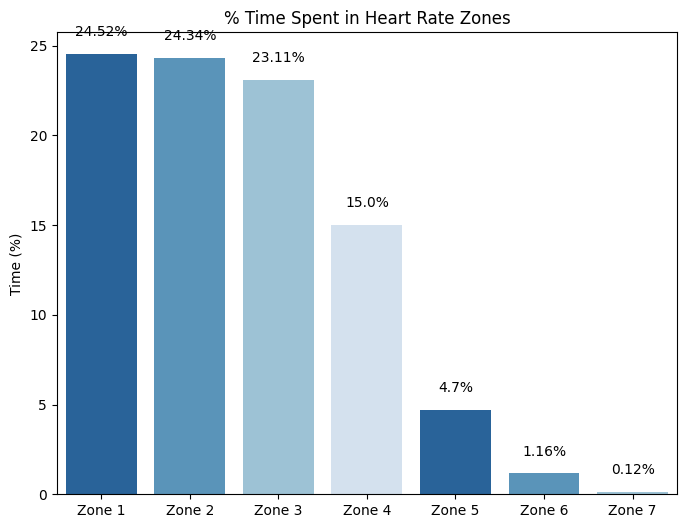

In [5]:
# Define a custom color palette with shades of blue
colors = sns.color_palette("Blues_r", 4)

# create a bar chart using seaborn
plt.figure(figsize=(8,6))
sns.barplot(x='HR Zone', y='Avg Time', data=plot_data, palette=colors)

# add percentage labels on top of each bar
for index, row in plot_data.iterrows():
    plt.text(index, row['Avg Time']+1, str(round(row['Avg Time'],2))+'%', ha='center')

# set the chart title and axis labels
plt.title('% Time Spent in Heart Rate Zones')
plt.xlabel('')
plt.ylabel('Time (%)')

# display the chart
plt.show()

(50.0, 200.0)

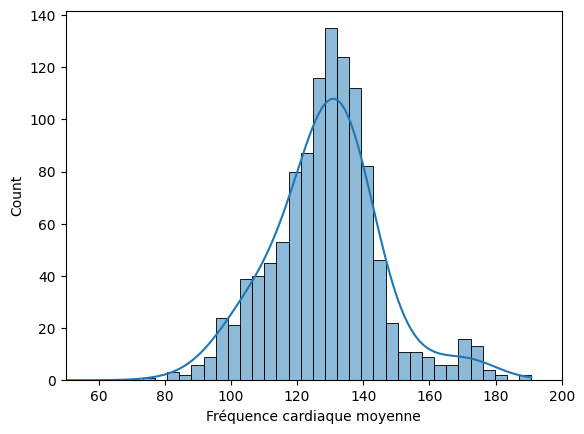

In [6]:
sns.histplot(data=df_zone, x='Fréquence cardiaque moyenne', kde=True)
plt.xlim(50,200)

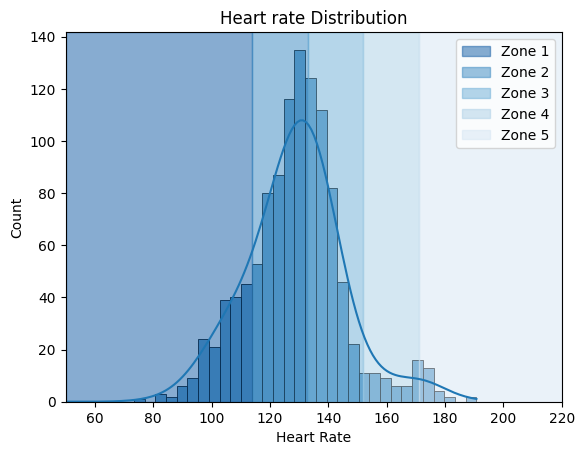

In [7]:
import seaborn as sns

# Define the HR zones
zones = {'Zone 1': (50, 114), 'Zone 2': (114, 133), 'Zone 3': (133, 152), 'Zone 4': (152, 171), 'Zone 5': (171, 220)}

# Define a custom color palette with shades of blue
colors = sns.color_palette("Blues_r", 5)

# Plot the histogram with the custom color palette
ax = sns.histplot(data=df_zone, x='Fréquence cardiaque moyenne', kde=True, palette=colors, alpha=0.7)

# Color each bar based on its HR zone
for zone, values in zones.items():
    ax.axvspan(values[0], values[1], alpha=0.5, color=colors[list(zones.keys()).index(zone)], label=zone)

# Set the x-axis limits and labels
ax.set_xlim(50, 220)
ax.set_xlabel('Heart Rate')
ax.set_title("Heart rate Distribution")

# Add a legend
ax.legend()

# Show the plot
plt.show()


### Ride Map

In [8]:
def plot_ride_map(csv_file):
    """
    Plot a ride map using latitude and longitude data from a CSV file.

    Parameters:
    -----------
    csv_file : str
        Path to the CSV file containing latitude and longitude data.

    Returns:
    --------
    None
    """
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Check if the latitude and longitude columns exist in the DataFrame
    if 'latitude' in df.columns and 'longitude' in df.columns:
        # Extract the latitude and longitude data
        latitudes = df['latitude']
        longitudes = df['longitude']
    elif 'position_lat' in df.columns and 'position_long' in df.columns:
        # Extract the position_lat and position_long data and convert to floating-point values
        latitudes = df['position_lat'] / (2**32/360)
        longitudes = df['position_long'] / (2**32/360)
    else:
        raise ValueError("CSV file does not contain latitude and longitude data.")

    # Create a Polyline object from the latitude and longitude data
    locations = list(zip(latitudes, longitudes))
    line = Polyline(
        locations=locations,
        color="green",
        fill=False
    )

    # Create a Map object and add the Polyline to it
    center_lat = np.mean(latitudes)
    center_long = np.mean(longitudes)
    m = Map(center=(center_lat, center_long), zoom=12)
    m.add_layer(line)

    # Display the Map object
    display(m)


In [9]:
plot_ride_map('data/activities_csv/1989387789.csv')

Map(center=[45.06310172667161, 5.721469493943025], controls=(ZoomControl(options=['position', 'zoom_in_text', …

## Power Distribution

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

def plot_power(csv_path, activities_csv_path):
    """
    Reads a CSV file and plots the power, heart rate, cadence, and speed over time, if the file has the corresponding columns.

    Parameters:
    -----------
    csv_path : str
        Path to the CSV file.

    Returns:
    --------
    None
    """
    # Read the CSV file
    df = pd.read_csv(csv_path)

    # Convert the timestamp column to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Check if the file has a 'power' column
    if 'power' in df.columns:
        # Check if the 'power' column is not completely null
        if not df['power'].isnull().all():
            # Get the activity_id from the CSV file name
            activity_id = activity_id = df["activity_id"][0]

            # Read the activities CSV file
            activities_df = pd.read_csv(activities_csv_path)

            # Find the row with the matching activity_id
            activity_row = activities_df.loc[activities_df["ID de l'activité"] == activity_id]

            # Get the ride date, distance, and duration
            ride_date = activity_row["Date de l'activité"].values[0]
            ride_distance = float(activity_row['Distance'].values[0].replace(',', '.'))
            ride_duration = activity_row['Temps écoulé'].values[0]

            # Convert the duration from seconds to h:min
            ride_duration = int(activity_row['Temps écoulé'].values[0])
            hours, remainder = divmod(ride_duration, 3600)
            minutes, seconds = divmod(remainder, 60)
            ride_duration_str = f"{hours:02d}:{minutes:02d}"

            # Convert speed from m/s to km/h
            df['speed'] = df['speed'] * 3.6

            # Plot the power, heart rate, cadence, and speed over time
            fig, axs = plt.subplots(nrows=4, figsize=(20, 16), sharex=True)
            axs[0].plot(df['timestamp'], df['power'])
            axs[0].set_title(f'Power over Time\n\nDate Activité: {ride_date}\nDistance: {float(ride_distance):.1f} km\nDurée: {ride_duration_str}', fontweight='bold')
            axs[1].plot(df['timestamp'], df['cadence'], color='green')
            axs[1].set_title('Cadence over Time', fontweight='bold')
            axs[2].plot(df['timestamp'], df['speed'], color='orange')
            axs[2].set_title('Speed over Time', fontweight='bold')
            axs[3].plot(df['timestamp'], df['heart_rate'], color='red')
            axs[3].set_title('Heart Rate over Time', fontweight='bold')
            axs[3].set_xlabel('Time')

            # Set y-axis labels
            axs[0].set_ylabel('Power')
            axs[1].set_ylabel('Cadence')
            axs[2].set_ylabel('Speed (km/h)')
            axs[3].set_ylabel('Heart Rate')

            # Set x-axis ticks every 10 minutes
            axs[3].xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
            axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
           

            # Rotate x-axis tick labels
            plt.setp(axs[3].get_xticklabels(), rotation=45, ha='right')

            plt.show()
        else:
            print('The power column is completely null.')
    else:
        print('File does not have a power column.')


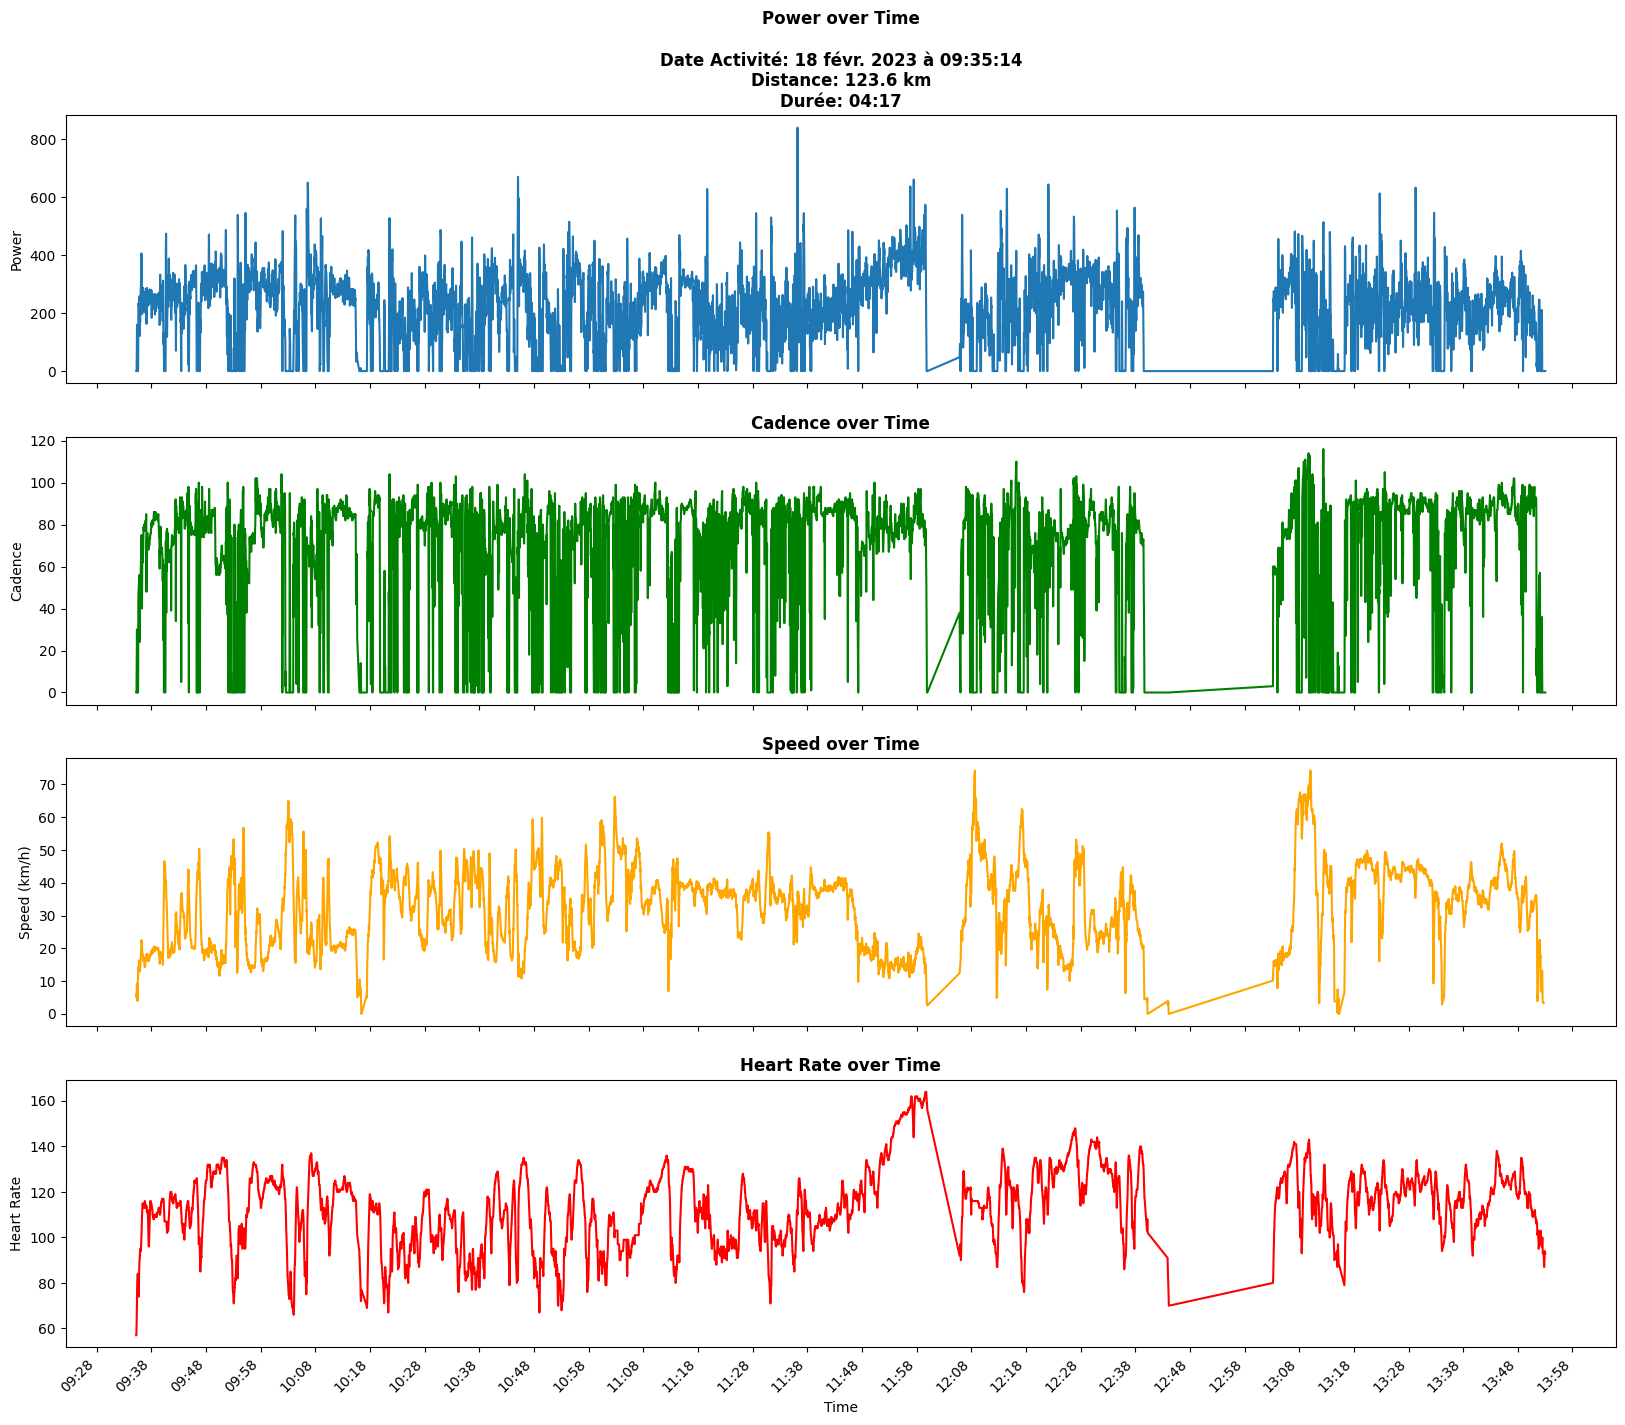

In [11]:
plot_power('data/activities_csv/9212811005.csv', "data/activities.csv")


# Ride Frequency

#### Weekly

<AxesSubplot: >

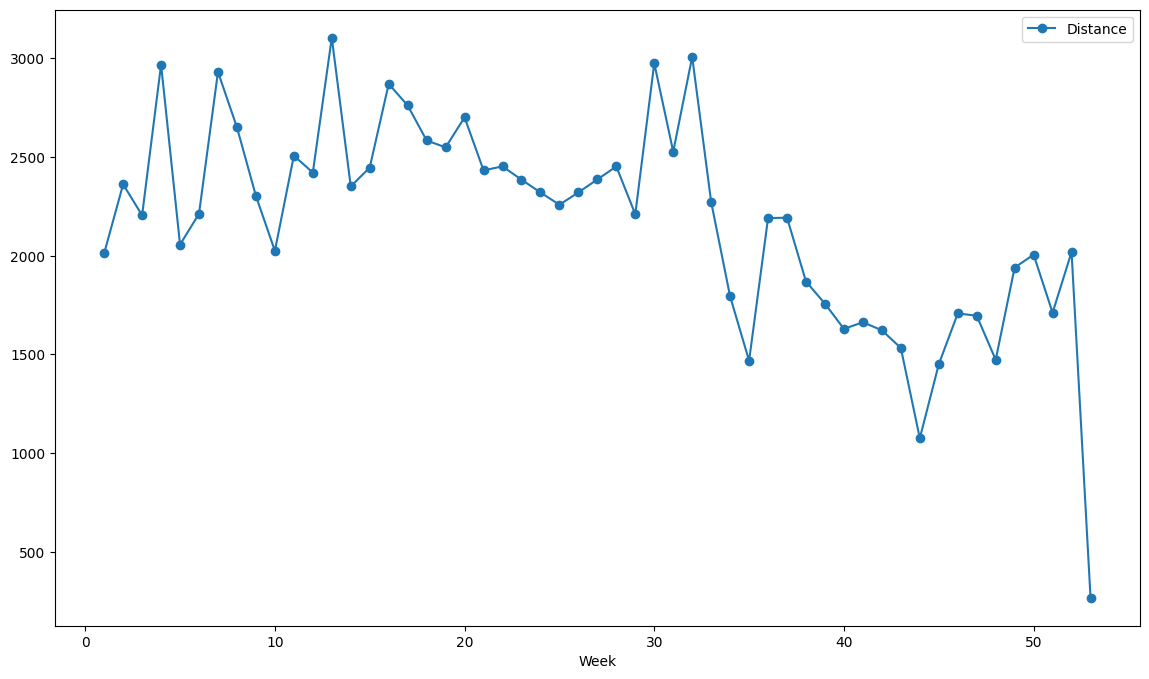

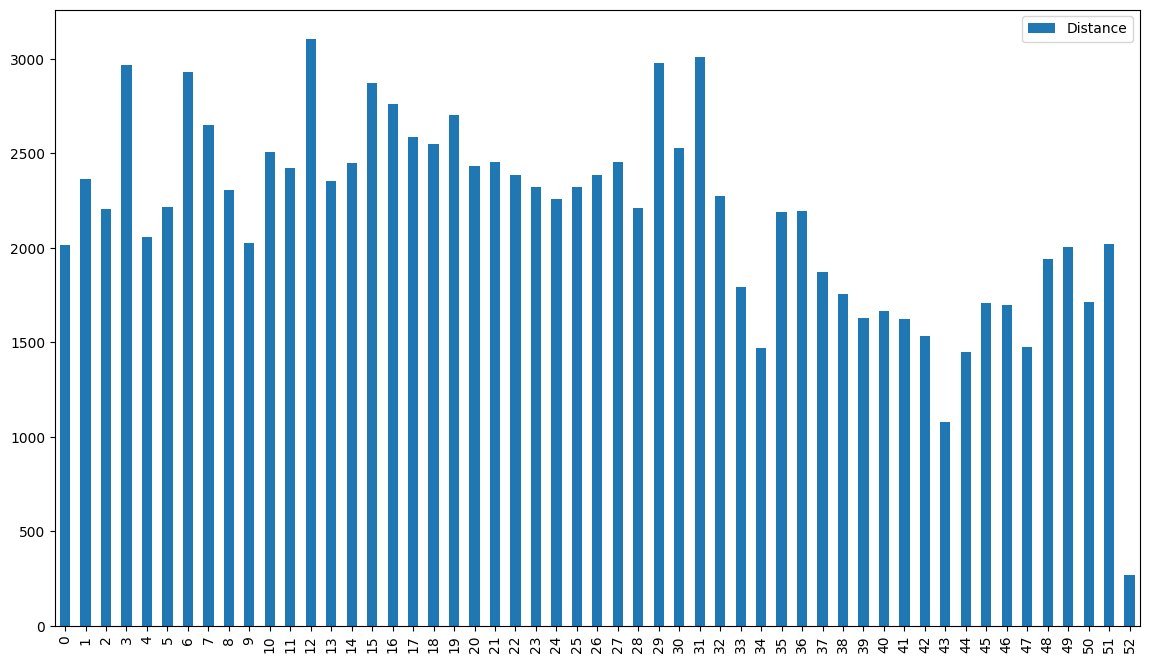

In [15]:
df_week = activities_data.groupby('Week')['Distance'].sum().reset_index().sort_values('Week')
#print (df)

df_week.plot(x='Week',y='Distance', marker='o', figsize=(14,8))
df_week.plot(y="Distance", kind="bar", figsize=(14,8))

#### Monthly

<AxesSubplot: >

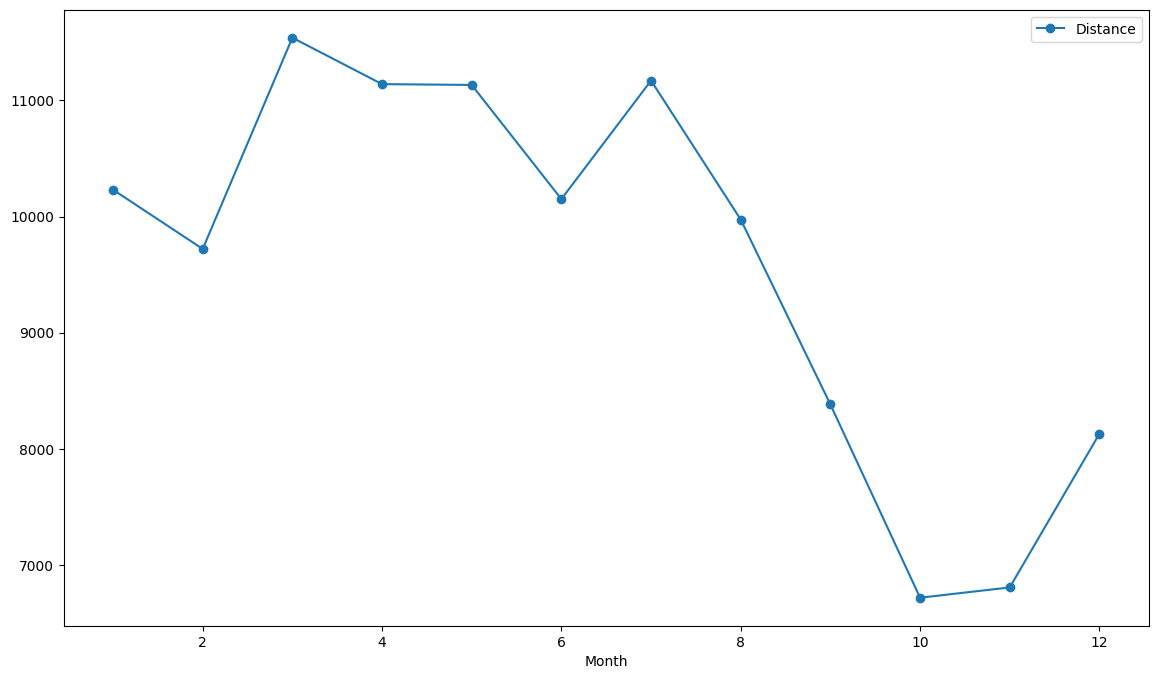

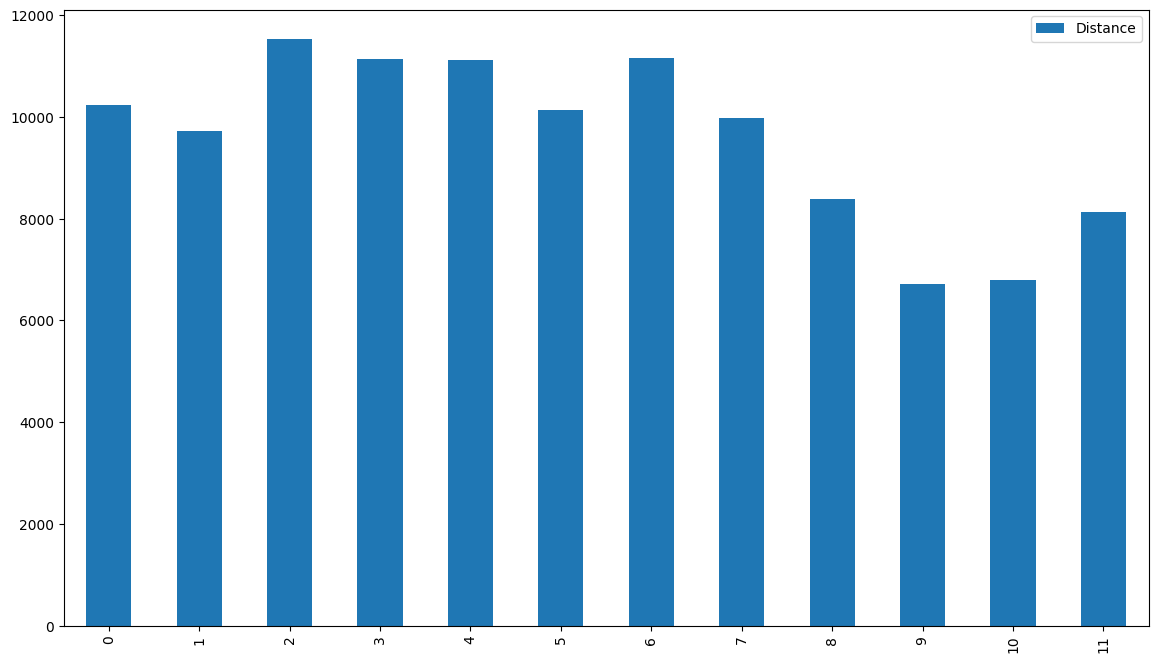

In [16]:
df_month = activities_data.groupby('Month')['Distance'].sum().reset_index().sort_values('Month')
#print (df)

df_month.plot(x='Month',y='Distance', marker='o', figsize=(14,8))
df_month.plot(y="Distance", kind="bar", figsize=(14,8))

#### Daily

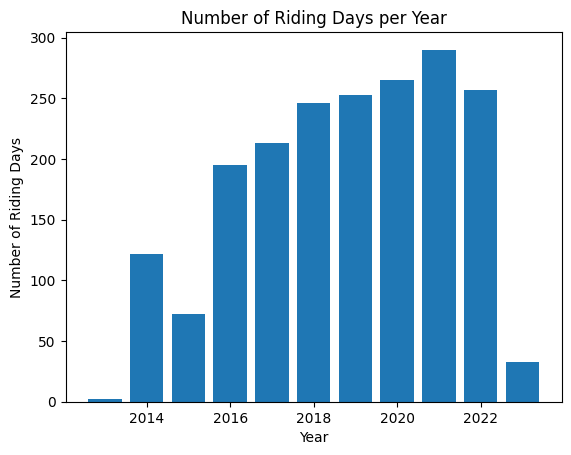

In [17]:
# Group the data by year and count the number of unique days with an activity
riding_days_per_year = activities_data.groupby(activities_data['Date'].dt.year)['Date'].nunique()

# Create a bar chart
plt.bar(riding_days_per_year.index, riding_days_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Riding Days')
plt.title('Number of Riding Days per Year')
plt.show()

## Activity 18th Feb

In [243]:
data = pd.read_csv('data/activities_csv/9212811005.csv')
# Convert speed from m/s to km/h
data['enhanced_speed'] = data['enhanced_speed'] * 3.6
data.columns

Index(['activity_id', 'timestamp', 'heart_rate', 'position_lat',
       'position_long', 'gps_accuracy', 'distance', 'calories', 'cadence',
       'enhanced_speed', 'speed', 'power', 'battery_soc', 'left_right_balance',
       'left_pedal_smoothness', 'right_pedal_smoothness',
       'left_torque_effectiveness', 'right_torque_effectiveness',
       'temperature', 'enhanced_altitude', 'altitude', 'grade', 'ascent',
       'descent', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [244]:
def activity_dive_in_dataset(zone_df, athlete_df, date):
    """
    Create a dataset for a given activity with all the need columns.

    Args:
        df_activities: path of the activities dataset.
        zone_df: path of the zone dataset.
        athlete_df: path of the athlete profile dataset.
        date: date of the activity to analyze.

    Returns:
        visual_df: visual data frame
    """
    df_act = loadData()
    df_act = df_act[df_act['Date'] == date]
    df_zone = pd.read_csv(zone_df, index_col='Unnamed: 0')
    df_zone = df_zone[df_zone['Date'] == date]
    df_athlete = pd.read_csv(athlete_df, index_col='Unnamed: 0')
    df_athlete = df_athlete[df_athlete['Date'] == date]

    ### Merge
    df_activity_visual = df_zone.merge(df_act[['Nom du fichier', 'Temps écoulé', 'Dénivelé positif', 'Dénivelé négatif', 'Altitude min.',
       'Altitude max.', 'Pente max.', 'Pente moyenne', 'Cadence max.']], how='left', on=['Nom du fichier'])
    df_activity_visual = df_activity_visual.merge(df_athlete[['Nom du fichier', 'new_relative_effort', 'TSS', 'HRR', 'trimp', 'HRSS',
       'Fitness', 'Fitness Diff', 'Fatigue', 'Fatigue Diff', 'Form']], how='left', on=['Nom du fichier'])
    
    return df_activity_visual

In [447]:
df_activity_visual = activity_dive_in_dataset('data/zone_data_6.csv', 'data/athlete_profile_dataset.csv', "2023-02-18")
df_activity_visual.head()

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,...,new_relative_effort,TSS,HRR,trimp,HRSS,Fitness,Fitness Diff,Fatigue,Fatigue Diff,Form
0,2023-02-18,09:35:14,activities/9212811005.fit.gz,224.88,123.64,113.648216,NaN,32.99,75.374855,217.386063,...,45.0,162.0,0.389186,118.0,69.0,37.9,0.7,67.5,0.2,-30.1


In [442]:
RE_hr_data = calculate_hr_zones_elevate(190)
RE_hr_data

,Zone,Name,Lower Bound,Upper Bound,Range
0,1,Endurance,95.0,114.0,< 114
1,2,Moderate,114.0,133.0,114 - 133
2,3,Tempo,133.0,152.0,133 - 152
3,4,Threshold,152.0,171.0,152 - 171
4,5,Anaerobic,171.0,190.0,171 - 190
5,6,Max,190.0,inf,>190


In [446]:
print("Activity: ", df_activity_visual['Date'].iloc[0], " - ", df_activity_visual['Time'].iloc[0])

#Move Ratio
move_ratio = round(df_activity_visual['Durée de déplacement'] / df_activity_visual['Temps écoulé'], 2)
print('\033[1m' + 'Move Ratio: ' + '\033[0m', move_ratio.values[0])

# Print HRSS, HRSS per hour, and average HRR
HRSS = df_activity_visual['HRSS'][0]
HRSS_per_hour = round(HRSS / ((df_activity_visual['Durée de déplacement']/60)[0]), 2)
HRR = round(df_activity_visual['HRR'][0]*100, 0)

print('\033[1m' + 'HRSS: ' + '\033[0m', HRSS)
print('\033[1m' + 'HRSS per hour: ' + '\033[0m', HRSS_per_hour)
print('\033[1m' + 'Heart rate Reserve Avg: ' + '\033[0m', HRR)

# Calculate and print TRIMP and TRIMP per hour, rounded to 2 decimals
trimp = df_activity_visual['trimp'][0]
trimp_per_hour = round(trimp / ((df_activity_visual['Durée de déplacement']/60)[0]), 2)

print('\033[1m' + 'TRIMP: ' + '\033[0m', trimp)
print('\033[1m' + 'TRIMP per hour: ' + '\033[0m', trimp_per_hour)

Activity:  2023-02-18  -  09:35:14
Move Ratio:  0.87
HRSS:  69.0
HRSS per hour:  18.41
Heart rate Reserve Avg:  39.0
TRIMP:  118.0
TRIMP per hour:  31.48


In [448]:
def plot_hr_zones(df_activity_visual, RE_hr_data):
    """
    Plots a bar chart of the time spent in each HR zone, with a table of the time spent and percentage of time spent
    in each zone.

    Args:
        RE_hr_data (pd.DataFrame): DataFrame containing HR zone data, including zone name, lower and upper bounds.
        df_activity_visual (pd.DataFrame): DataFrame containing activity data, including time spent in each HR zone.

    Returns:
        visuals
    """
    # Create a dictionary to map zone names to their corresponding bounds
    zone_bounds = dict(zip(RE_hr_data['Name'], RE_hr_data[['Lower Bound', 'Upper Bound']]))

    # Multiply the zone times by the duration to get the total time in each zone
    zone_times = [df_activity_visual['Durée de déplacement'].iloc[0] * df_activity_visual['time_z{}'.format(i)].iloc[0] for i in range(1, 7)]

    # Create a list of formatted time strings
    time_strings = []
    for t in zone_times:
        td = datetime.timedelta(minutes=t)
        time_str = (datetime.datetime(1, 1, 1) + td).strftime('%H:%M:%S')
        time_strings.append(time_str)

    # Create a list of zone labels for hover text
    zone_names = [f"Z{i+1}: {zone['Lower Bound']}-{zone['Upper Bound']} bpm" for i, zone in RE_hr_data.iterrows()]

    # Create a bar plot of the time spent in each HR zone using plotly
    fig1 = go.Figure(data=[go.Bar(
                x=zone_names, y=zone_times,
                hovertemplate='<b>%{x}</b><br>' +
                            'Zone held during %{customdata}<br>' +
                            '<extra></extra>',
                customdata=time_strings
    )])
    fig1.update_layout(title='Time spent in each HR zone', xaxis_title='', yaxis_title='', height=600)

    # Create table with time and percentage for each HR zone
    zone_labels = ['Zone ' + str(i) for i in range(1, 7)]
    zone_ranges = [f"{zone['Range']}" for _, zone in RE_hr_data.iterrows()]
    zone_percentages = [df_activity_visual['time_z{}'.format(i)].iloc[0] * 100 for i in range(1, 7)]
    zone_percentages_str = [f"{p:.1f}%" for p in zone_percentages]
    table_data = {
        'Zone': zone_labels,
        'BPM Range': zone_ranges,
        'Time': time_strings,
        'Percentage': zone_percentages_str
    }

    fig2 = go.Figure(data=[go.Table(
        header=dict(values=['Zone', 'BPM Range', 'Time', 'Percentage'],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=list(table_data.values()),
                   fill_color='lavender',
                   align='left'))
    ])
    fig2.update_layout(height=600)

    # Create subplots for the bar chart and table
    fig = sp.make_subplots(rows=1, cols=2,
                            column_widths=[0.6, 0.4],
                            specs=[[{"type": "bar"},
                                    {"type": "table"}]])

    fig.add_trace(fig1.data[0], row=1, col=1)
    fig.add_trace(fig2.data[0], row=1, col=2)

    fig.update_layout(margin=dict(l=10, r=10, t=10, b=10), height=400, plot_bgcolor='rgba(0,0,0,0)')

    return fig


In [449]:
fig = plot_hr_zones(df_activity_visual, RE_hr_data)
fig


In [11]:
import pandas as pd

# Convert the timestamp column to a datetime object and set it as the index
data['timestamp'] = pd.to_datetime(data['timestamp'])

#rolling data
data_rolling = data.copy()
data_rolling.set_index('timestamp', inplace=True)

# Resample the data to 1-minute intervals
data_rolling = data_rolling.resample('1T').mean()

# Calculate the rolling mean heart rate for 20 and 60 minute windows
hr_20min = data_rolling['heart_rate'].rolling('20min').mean().max()
hr_60min = data_rolling['heart_rate'].rolling('60min').mean().max()

# Find the start and end timestamps for the 20-minute and 60-minute periods with the highest heart rate
start_20min = data_rolling['heart_rate'].rolling('20min').mean().idxmax() - pd.Timedelta(minutes=19)
end_20min = data_rolling['heart_rate'].rolling('20min').mean().idxmax()
start_60min = data_rolling['heart_rate'].rolling('60min').mean().idxmax() - pd.Timedelta(minutes=59)
end_60min = data_rolling['heart_rate'].rolling('60min').mean().idxmax()

# Print the results
print(f'Best 20-minute heart rate: {hr_20min:.2f} bpm')
print(f'Start time: {start_20min}, End time: {end_20min}')
print(f'Best 60-minute heart rate: {hr_60min:.2f} bpm')
print(f'Start time: {start_60min}, End time: {end_60min}')


Best 20-minute heart rate: 137.83 bpm
Start time: 2023-02-18 11:45:00+00:00, End time: 2023-02-18 12:04:00+00:00
Best 60-minute heart rate: 125.31 bpm
Start time: 2023-02-18 11:43:00+00:00, End time: 2023-02-18 12:42:00+00:00


## Speed

In [18]:
# Assuming the data is in a DataFrame called 'data' with a column 'enhanced_speed'
speed_20min = data_rolling['enhanced_speed'].rolling('20min').mean().max()
# Calculate standard deviation of speed
std_speed = data['enhanced_speed'].std()
#average speed
speed_avg =round(df_activity_visual['Vitesse moyenne'][0], 1)

print('\033[1m' + 'Average Speed: ' + '\033[0m', str(round(speed_avg, 2)) + ' km/h')
print('\033[1m' + 'Best 20mins Speed: ' + '\033[0m', str(round(speed_20min, 1)) + ' km/h')
print('\033[1m' + 'Std Deviation: ' + '\033[0m', str(round(std_speed, 1)) + ' km/h')

Average Speed:  33.0 km/h
Best 20mins Speed:  41.6 km/h
Std Deviation:  12.0 km/h


In [427]:
speed = {
        "Z1": (0, 10),
        "Z2": (10, 15),
        "Z3": (15, 20),
        "Z4": (20, 25),
        "Z5": (25, 27),
        "Z6": (27, 30),
        "Z7": (30, 32),
        "Z8": (32, 34),
        "Z9": (34, 36),
        "Z10": (36, 38),
        "Z11": (38, 40),
        "Z12": (40, 42),
        "Z13": (42, 44),
        "Z14": (44, 47),
        "Z15": (47, 50),
        "Z16": (50, 60),
        "Z17": (60, 75)
}

# create a DataFrame with the zone names, lower and upper bounds
speed_zones_df = pd.DataFrame(speed.items(), columns=['zone', 'bounds'])
speed_zones_df[['lower', 'upper']] = pd.DataFrame(speed_zones_df['bounds'].tolist(), index=speed_zones_df.index)
speed_zones_df = speed_zones_df.drop('bounds', axis=1)

In [428]:
def calculate_time_in_speed_zones(df_activity_visual, speed_zones):
    """
    Calculate the time spent in each power zone for each activity and add the results as columns.
    
    Args:
    - df_activity_visual (pandas.DataFrame): A DataFrame containing information about the activity.
    - speed_zones (list): list of speed_speed_zones
    
    Returns:
    - df_activity_visual (pandas.DataFrame): The original DataFrame with new columns for the time spent in each speed zone.
    """
    df_activity_visual = df_activity_visual.drop(['time_z1', 'avgHR_z1', 'time_z2', 'avgHR_z2', 'time_z3', 'avgHR_z3', 'time_z4', 'avgHR_z4', 'time_z5', 'avgHR_z5', 'time_z6', 'avgHR_z6'], axis=1)
    
    # Loop through the rows in df and calculate time spent in each zone for the corresponding activity
    for index, row in df_activity_visual.iterrows():
        
        # Extract activity id from the file name column
        if "Nom du fichier" in row:
            activity_num = str(row["Nom du fichier"]).split("/")[-1].split(".")[0]
            # Load the activity data
            activity_file = f"data/activities_csv/{activity_num}.csv"
        else:
            activity_num = row['nom']
            activity_file = f"data/activities_csv/{activity_num}.csv"
            
        csv_data = pd.read_csv(activity_file)
        csv_data['enhanced_speed'] = csv_data['enhanced_speed']*3.6
        
        # Calculate the time spent in each zone
        time_in_zone = {zone: 0 for zone in speed_zones}
        for _, row in csv_data.iterrows():
            speed = row["enhanced_speed"]
            for zone, (lower, upper) in speed_zones.items():
                if lower <= speed < upper:
                    time_in_zone[zone] += 1
        
        # Calculate the percentage of time spent in each zone
        total_time = len(csv_data)
        percent_time_in_zone = {zone: round(time / total_time, 4) for zone, time in time_in_zone.items()}
        
        # Add new columns with time spent in each zone to df_activity_visual
        for zone, percent_time in percent_time_in_zone.items():
            column_name = f"time_{zone.lower()}"
            df_activity_visual.loc[index, column_name] = percent_time
    
    return df_activity_visual


In [429]:
speed_zones = calculate_time_in_speed_zones(df_activity_visual, speed)
speed_zones

Index(['Date', 'Time', 'Nom du fichier', 'Durée de déplacement', 'Distance',
       'Fréquence cardiaque moyenne', 'Fréquence cardiaque maximum',
       'Vitesse moyenne', 'Cadence moyenne', 'Puissance moyenne',
       'Poids de l'athlète', 'Mesure d'effort', 'Puissance moyenne pondérée',
       'intensity_score', 'Temps écoulé', 'Dénivelé positif',
       'Dénivelé négatif', 'Altitude min.', 'Altitude max.', 'Pente max.',
       'Pente moyenne', 'Cadence max.', 'new_relative_effort', 'TSS', 'HRR',
       'trimp', 'HRSS', 'Fitness', 'Fitness Diff', 'Fatigue', 'Fatigue Diff',
       'Form', 'time_z7', 'time_z8', 'time_z9', 'time_z10', 'time_z11',
       'time_z12', 'time_z13', 'time_z14', 'time_z15', 'time_z16', 'time_z17',
       'time_z18', 'time_z19', 'time_z20', 'time_z21', 'time_z22', 'time_z23',
       'time_z24', 'time_z25', 'time_z26', 'time_z27', 'time_z28', 'time_z29',
       'time_z30', 'time_z1', 'time_z2', 'time_z3', 'time_z4', 'time_z5',
       'time_z6'],
      dtype='obj

In [434]:
import plotly.graph_objects as go
import plotly.subplots as sp
import datetime

def plot_speed_zones(speed_zones, speed_zones_df):
    """
    Plots a bar chart of the time spent in each speed zone, with a table of the time spent and percentage of time spent
    in each zone.

    Args:
        speed_zones (pd.DataFrame): DataFrame containing speed zone data, including zone name, lower and upper bounds.
        speed_zones_df (pd.DataFrame): DataFrame containing speed zone data, including zone name, lower and upper bounds.

    Returns:
        visuals
    """
    # Multiply the zone times by the duration to get the total time in each zone
    zone_times = [speed_zones['Durée de déplacement'].iloc[0] *speed_zones['time_z{}'.format(i)].iloc[0] for i in range(1, 18)]

    # Create a list of formatted time strings
    time_strings = []
    for t in zone_times:
        td = datetime.timedelta(minutes=t)
        time_str = (datetime.datetime(1, 1, 1) + td).strftime('%M:%S')
        time_strings.append(time_str)
    time_strings

    #Create a list of zone labels for hover text
    zone_names = [f"Z{i+1}: {zone['lower']}-{zone['upper']} bpm" for i, zone in speed_zones_df.iterrows()]

    # Create a bar plot of the time spent in each speed zone using plotly
    fig1 = go.Figure(data=[go.Bar(
                x=zone_names, y=zone_times,
                hovertemplate='<b>%{x}</b><br>' +
                            'Zone held during %{customdata}<br>' +
                            '<extra></extra>',
                customdata=time_strings
    )])
    fig1.update_layout(title='Time spent in each speed zone', xaxis_title='', yaxis_title='', height=600)

    # Create table with time and percentage for each speed zone
    zone_labels = ['Zone ' + str(i) for i in range(1, 18)]
    zone_from =  [f"{zone['lower']}" for _, zone in speed_zones_df.iterrows()]
    zone_to =  [f"{zone['upper']}" for _, zone in speed_zones_df.iterrows()]
    zone_percentages = [speed_zones['time_z{}'.format(i)].iloc[0] * 100 for i in range(1, 18)]
    zone_percentages_str = [f"{p:.1f}%" for p in zone_percentages]
    table_data = {
        'Zone': zone_labels,
        'From KPH': zone_from,
        'To KPH': zone_to,
        'Time': time_strings,
        'Percentage': zone_percentages_str
    }

    fig2 = go.Figure(data=[go.Table(
        header=dict(values=['Zone', 'From KPH', 'To KPH', 'Time', 'Percentage'],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=list(table_data.values()),
                   fill_color='lavender',
                   align='left'))
    ])
    fig2.update_layout(height=600)

    # Create subplots for the bar chart and table
    fig = sp.make_subplots(rows=1, cols=2,
                            column_widths=[0.6, 0.4],
                            specs=[[{"type": "bar"},
                                    {"type": "table"}]])

    fig.add_trace(fig1.data[0], row=1, col=1)
    fig.add_trace(fig2.data[0], row=1, col=2)

    fig.update_layout(margin=dict(l=10, r=10, t=10, b=10), height=500, plot_bgcolor='rgba(0,0,0,0)')

    fig.show()


In [435]:
plot_speed_zones(speed_zones, speed_zones_df)

### POWER

In [25]:
# Assuming the data is in a DataFrame called 'data' with a column 'enhanced_speed'
power_20min = data_rolling['power'].rolling('20min').mean().max()
#average speed
power_avg =round(df_activity_visual['Puissance moyenne pondérée'][0], 1)
#variability index
var_index = (df_activity_visual['Puissance moyenne pondérée']/df_activity_visual['Puissance moyenne'])[0]
#normalized power kg
norm_power_kg = (df_activity_visual['Puissance moyenne pondérée']/70)[0]
#Avg watts per kg
w_kg = (df_activity_visual['Puissance moyenne']/70)[0]

print('\033[1m' + 'Normalized Power: ' + '\033[0m', str(round(power_avg, 2)) + ' w')
print('\033[1m' + 'Best 20mins Power: ' + '\033[0m', str(round(power_20min, 1)) + ' w')
print('\033[1m' + 'Vatiability Index: ' + '\033[0m', str(round(var_index, 1)))
print('\033[1m' + 'Normalized Power / kg: ' + '\033[0m', str(round(norm_power_kg, 1)) + ' w/kg')
print('\033[1m' + 'Avg Watts / kg: ' + '\033[0m', str(round(w_kg, 1)) + ' w/kg')


Normalized Power:  251.0 w
Best 20mins Power:  336.0 w
Vatiability Index:  1.2
Normalized Power / kg:  3.6 w/kg
Avg Watts / kg:  3.1 w/kg


In [418]:
power = {
        "Z1": (0, 50),
        "Z2": (50, 100),
        "Z3": (100, 150),
        "Z4": (150, 175),
        "Z5": (175, 200),
        "Z6": (200, 225),
        "Z7": (225, 250),
        "Z8": (250, 300),
        "Z9": (300, 325),
        "Z10": (325, 350),
        "Z11": (350, 375),
        "Z12": (375, 400),
        "Z13": (400, 425),
        "Z14": (425, 450),
        "Z15": (450, 475),
        "Z16": (475, 500),
        "Z17": (500, 600),
        "Z18": (600, 800),
        "Z19": (800, 1500)
}

# create a DataFrame with the zone names, lower and upper bounds
power_zones_df = pd.DataFrame(power.items(), columns=['zone', 'bounds'])
power_zones_df[['lower', 'upper']] = pd.DataFrame(power_zones_df['bounds'].tolist(), index=power_zones_df.index)
power_zones_df = power_zones_df.drop('bounds', axis=1)

In [419]:
def calculate_time_in_power_watt_zones(df_activity_visual, power_zones):
    """
    Calculate the time spent in each power zone for each activity and add the results as columns.
    
    Args:
    - df_activity_visual (pandas.DataFrame): A DataFrame containing information about the activity.
    -power_power_zones (list): list of power power_zones
    
    Returns:
    - df_activity_visual (pandas.DataFrame): The original DataFrame with new columns for the time spent in each power zone.
    """

    
    # Loop through the rows in df and calculate time spent in each zone for the corresponding activity
    for index, row in df_activity_visual.iterrows():
        
        # Extract activity id from the file name column
        if "Nom du fichier" in row:
            activity_num = str(row["Nom du fichier"]).split("/")[-1].split(".")[0]
            # Load the activity data
            activity_file = f"data/activities_csv/{activity_num}.csv"
        else:
            activity_num = row['nom']
            activity_file = f"data/activities_csv/{activity_num}.csv"
            
        csv_data = pd.read_csv(activity_file)
        
        # Calculate the time spent in each zone
        time_in_zone = {zone: 0 for zone in power_zones}
        for _, row in csv_data.iterrows():
            power = row["power"]
            for zone, (lower, upper) in power_zones.items():
                if lower <= power < upper:
                    time_in_zone[zone] += 1
        
        # Calculate the percentage of time spent in each zone
        total_time = len(csv_data)
        percent_time_in_zone = {zone: round(time / total_time, 4) for zone, time in time_in_zone.items()}
        
        # Add new columns with time spent in each zone to df_activity_visual
        for zone, percent_time in percent_time_in_zone.items():
            column_name = f"time_{zone.lower()}"
            df_activity_visual.loc[index, column_name] = percent_time
    
    return df_activity_visual


In [420]:
power_zones = calculate_time_in_power_watt_zones(df_activity_visual, power)
power_zones

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,...,time_z21,time_z22,time_z23,time_z24,time_z25,time_z26,time_z27,time_z28,time_z29,time_z30
0,2023-02-18,09:35:14,activities/9212811005.fit.gz,224.88,123.64,113.648216,NaN,32.99,75.374855,217.386063,...,0.0061,0.0018,0.0019,0.0001,0.0,0.0002,0.0,0.0,0.0,0.0


In [423]:
import plotly.graph_objects as go
import plotly.subplots as sp
import datetime

def plot_power_zones(power_zones, power_zones_df):
    """
    Plots a bar chart of the time spent in each power zone, with a table of the time spent and percentage of time spent
    in each zone.

    Args:
        power_zones (pd.DataFrame): DataFrame with the activity data and the calculated time spent in each zone.
        power_zones_df (pd.DataFrame): DataFrame containing power zone data, including zone name, lower and upper bounds.

    Returns:
        visuals
    """
    # Multiply the zone times by the duration to get the total time in each zone
    zone_times = [power_zones['Durée de déplacement'].iloc[0] *power_zones['time_z{}'.format(i)].iloc[0] for i in range(1, 20)]

    # Create a list of formatted time strings
    time_strings = []
    for t in zone_times:
        td = datetime.timedelta(minutes=t)
        time_str = (datetime.datetime(1, 1, 1) + td).strftime('%M:%S')
        time_strings.append(time_str)
    time_strings

    #Create a list of zone labels for hover text
    zone_names = [f"Z{i+1}: {zone['lower']}-{zone['upper']} bpm" for i, zone in power_zones_df.iterrows()]

    # Create a bar plot of the time spent in each power zone using plotly
    fig1 = go.Figure(data=[go.Bar(
                x=zone_names, y=zone_times,
                hovertemplate='<b>%{x}</b><br>' +
                            'Zone held during %{customdata}<br>' +
                            '<extra></extra>',
                customdata=time_strings
    )])
    fig1.update_layout(title='Time spent in each power zone', xaxis_title='', yaxis_title='', height=600)

    # Create table with time and percentage for each power zone
    zone_labels = ['Zone ' + str(i) for i in range(1, 20)]
    zone_from =  [f"{zone['lower']}" for _, zone in power_zones_df.iterrows()]
    zone_to =  [f"{zone['upper']}" for _, zone in power_zones_df.iterrows()]
    zone_percentages = [power_zones['time_z{}'.format(i)].iloc[0] * 100 for i in range(1, 20)]
    zone_percentages_str = [f"{p:.1f}%" for p in zone_percentages]
    table_data = {
        'Zone': zone_labels,
        'From W': zone_from,
        'To W': zone_to,
        'Time': time_strings,
        'Percentage': zone_percentages_str
    }

    fig2 = go.Figure(data=[go.Table(
        header=dict(values=['Zone', 'From W', 'To W', 'Time', 'Percentage'],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=list(table_data.values()),
                   fill_color='lavender',
                   align='left'))
    ])
    fig2.update_layout(height=600)

    # Create subplots for the bar chart and table
    fig = sp.make_subplots(rows=1, cols=2,
                            column_widths=[0.6, 0.4],
                            specs=[[{"type": "bar"},
                                    {"type": "table"}]])

    fig.add_trace(fig1.data[0], row=1, col=1)
    fig.add_trace(fig2.data[0], row=1, col=2)

    fig.update_layout(margin=dict(l=10, r=10, t=10, b=10), height=550, plot_bgcolor='rgba(0,0,0,0)')

    return fig


In [424]:
plot_power_zones(power_zones, power_zones_df)

In [414]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

def plot_power_curve(df_activity_visual, df_data):
    """
    Plots the Power Curve for a given ride.

    Parameters:
    -----------
    df_activity_visual: pandas DataFrame
        DataFrame with the activity details including 'Durée de déplacement' column in minutes.
    df_data: pandas DataFrame
        DataFrame with the activity data including 'timestamp' and 'activity_id' columns.

    Returns:
    --------
    None: plots a line graph of the Power Curve with a table.
    """

    # Step 2: Convert the ride duration from minutes to seconds
    ride_duration = df_activity_visual['Durée de déplacement'] * 60

    # Step 3: Calculate the rolling average power for each time period
    df_data['timestamp'] = pd.to_datetime(df_data['timestamp'])
    data_rolling = df_data.copy()
    data_rolling.set_index('timestamp', inplace=True)

    # Resample the data to 1-second intervals
    data_rolling = data_rolling.resample('1S').mean()

    rolling_periods = [1, 2, 3, 5, 10, 20, 30, 60, 120, 300, 600, 1200, 1800, 3600, 7200]
    rolling_power = {p: data_rolling['power'].rolling(window=p, min_periods=1).mean() for p in rolling_periods}

    # Step 4: Find the maximum rolling average power for each time period
    max_rolling_power = [rp.max() for rp in rolling_power.values()]

    # Step 5: Plot the results in a line graph
    # Step 5: Plot the results in a line graph
    fig = px.line(x=rolling_periods, y=max_rolling_power, log_x=True, labels={
                  'x': 'Time (seconds)', 'y': 'Power (watts)'})

    # Format x-axis with time
    fig.update_xaxes(
        tickvals=[1, 2, 3, 5, 10, 20, 30, 60, 120, 300, 600, 1200, 3600, 7200],
        ticktext=['00:01', '00:02', '00:03', '00:05', '00:10', '00:20', '00:30', '01:00', '02:00', '05:00', '10:00', '20:00', '30:00', '1:00:00', '2:00:00'],
        tickangle=0,
        dtick=1
    )

    fig.update_layout(margin=dict(l=10, r=10, t=10, b=10), height=500, plot_bgcolor='rgba(0,0,0,0)')

    return fig



In [415]:
plot_power_curve(df_activity_visual, data)

### CADENCE

In [402]:
cadence = {
        "Z1": (0, 5),
        "Z2": (5, 10),
        "Z3": (10, 15),
        "Z4": (15, 20),
        "Z5": (20, 25),
        "Z6": (25, 30),
        "Z7": (30, 35),
        "Z8": (35, 40),
        "Z9": (40, 45),
        "Z10": (45, 50),
        "Z11": (50, 55),
        "Z12": (55, 60),
        "Z13": (60, 65),
        "Z14": (65, 70),
        "Z15": (70, 75),
        "Z16": (75, 80),
        "Z17": (80, 85),
        "Z18": (85, 90),
        "Z19": (90, 95),
        "Z20": (95, 100),
        "Z21": (100, 105),
        "Z22": (105, 110),
        "Z23": (110, 115),
        "Z24": (115, 125),
        "Z25": (125, 150)
}

# create a DataFrame with the zone names, lower and upper bounds
cadence_zones_df = pd.DataFrame(cadence.items(), columns=['zone', 'bounds'])
cadence_zones_df[['lower', 'upper']] = pd.DataFrame(cadence_zones_df['bounds'].tolist(), index=cadence_zones_df.index)
cadence_zones_df = cadence_zones_df.drop('bounds', axis=1)

In [403]:
def calculate_time_in_cadence_zones(df_activity_visual, cadence_zones):
    """
    Calculate the time spent in each cadence zone for each activity and add the results as columns.
    
    Args:
    - df_activity_visual (pandas.DataFrame): A DataFrame containing information about the activity.
    -cadence_zones (list): list of cadence zones
    
    Returns:
    - df_activity_visual (pandas.DataFrame): The original DataFrame with new columns for the time spent in each cadence zone.
    """

    
    # Loop through the rows in df and calculate time spent in each zone for the corresponding activity
    for index, row in df_activity_visual.iterrows():
        
        # Extract activity id from the file name column
        if "Nom du fichier" in row:
            activity_num = str(row["Nom du fichier"]).split("/")[-1].split(".")[0]
            # Load the activity data
            activity_file = f"data/activities_csv/{activity_num}.csv"
        else:
            activity_num = row['nom']
            activity_file = f"data/activities_csv/{activity_num}.csv"
            
        csv_data = pd.read_csv(activity_file)
        
        # Calculate the time spent in each zone
        time_in_zone = {zone: 0 for zone in cadence_zones}
        for _, row in csv_data.iterrows():
            cadence = row["cadence"]
            for zone, (lower, upper) in cadence_zones.items():
                if lower <= cadence < upper:
                    time_in_zone[zone] += 1
        
        # Calculate the percentage of time spent in each zone
        total_time = len(csv_data)
        percent_time_in_zone = {zone: round(time / total_time, 4) for zone, time in time_in_zone.items()}
        
        # Add new columns with time spent in each zone to df_activity_visual
        for zone, percent_time in percent_time_in_zone.items():
            column_name = f"time_{zone.lower()}"
            df_activity_visual.loc[index, column_name] = percent_time
    
    return df_activity_visual


In [404]:
cadence_zones = calculate_time_in_cadence_zones(df_activity_visual, cadence)
cadence_zones

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,...,time_z21,time_z22,time_z23,time_z24,time_z25,time_z26,time_z27,time_z28,time_z29,time_z30
0,2023-02-18,09:35:14,activities/9212811005.fit.gz,224.88,123.64,113.648216,NaN,32.99,75.374855,217.386063,...,0.0061,0.0018,0.0019,0.0001,0.0,0.0002,0.0,0.0,0.0,0.0


In [411]:
import plotly.graph_objects as go
import plotly.subplots as sp
import datetime

def plot_cadence_zones(df_activity_visual, cadence_zones, cadence_zones_df):
    """
    Plots a bar chart of the time spent in each cadence zone, with a table of the time spent and percentage of time spent
    in each zone.

    Args:
        cadence_zones (pd.DataFrame): DataFrame with the activity data and the calculated time spent in each zone.
        cadence_zones_df (pd.DataFrame): DataFrame containing cadence zone data, including zone name, lower and upper bounds.

    Returns:
        visuals
    """
    #Create time in cadence zones df 
    cadence_zones = calculate_time_in_cadence_zones(df_activity_visual, cadence_zones)

    # Multiply the zone times by the duration to get the total time in each zone
    zone_times = [cadence_zones['Durée de déplacement'].iloc[0] *cadence_zones['time_z{}'.format(i)].iloc[0] for i in range(1, 26)]

    # Create a list of formatted time strings
    time_strings = []
    for t in zone_times:
        td = datetime.timedelta(minutes=t)
        time_str = (datetime.datetime(1, 1, 1) + td).strftime('%M:%S')
        time_strings.append(time_str)
    time_strings

    #Create a list of zone labels for hover text
    zone_names = [f"Z{i+1}: {zone['lower']}-{zone['upper']} bpm" for i, zone in cadence_zones_df.iterrows()]

    # Create a bar plot of the time spent in each cadence zone using plotly
    fig1 = go.Figure(data=[go.Bar(
                x=zone_names, y=zone_times,
                 marker_color='rgb(102, 51, 153)',
                hovertemplate='<b>%{x}</b><br>' +
                            'Zone held during %{customdata}<br>' +
                            '<extra></extra>',
                customdata=time_strings
    )])
    fig1.update_layout(title='Time spent in each cadence zone', xaxis_title='', yaxis_title='', height=600)

    # Create table with time and percentage for each cadence zone
    zone_labels = ['Zone ' + str(i) for i in range(1, 26)]
    zone_from =  [f"{zone['lower']}" for _, zone in cadence_zones_df.iterrows()]
    zone_to =  [f"{zone['upper']}" for _, zone in cadence_zones_df.iterrows()]
    zone_percentages = [cadence_zones['time_z{}'.format(i)].iloc[0] * 100 for i in range(1, 26)]
    zone_percentages_str = [f"{p:.1f}%" for p in zone_percentages]
    table_data = {
        'Zone': zone_labels,
        'From RPM': zone_from,
        'To RPM': zone_to,
        'Time': time_strings,
        'Percentage': zone_percentages_str
    }

    fig2 = go.Figure(data=[go.Table(
        header=dict(values=['Zone', 'From RPM', 'To RPM', 'Time', 'Percentage'],
                    fill_color='antiquewhite',
                    align='left'),
        cells=dict(values=list(table_data.values()),
                   fill_color='white',
                   align='left'))
    ])
    fig2.update_layout(height=600)

    # Create subplots for the bar chart and table
    fig = sp.make_subplots(rows=1, cols=2,
                            column_widths=[0.7, 0.4],
                            specs=[[{"type": "bar"},
                                    {"type": "table"}]])

    fig.add_trace(fig1.data[0], row=1, col=1)
    fig.add_trace(fig2.data[0], row=1, col=2)

    fig.update_yaxes(showgrid=True, gridwidth=1, linecolor='black', gridcolor='lightgrey')
    fig.update_xaxes(showgrid=True, linecolor='black')
    fig.update_xaxes(tickangle=-45)

    fig.update_layout(margin=dict(l=10, r=10, t=10, b=10), height=650, plot_bgcolor='rgba(0,0,0,0)')

    fig.show()


In [412]:
plot_cadence_zones(df_activity_visual, cadence, cadence_zones_df)

In [41]:
# Calculate standard deviation of speed
std_cadence = round(data['cadence'].std(),2)
std_cadence

30.0

In [349]:
cadence = data['cadence']  # cadence column of the dataframe
duration = df_activity_visual['Temps écoulé'][0]  # duration of the ride in minutes
crank_revolutions = ((cadence / 60) * duration).mean()
crank_revolutions


288.67068562284595

In [352]:
# Calculate the average cadence on downhill terrain
downhill_cadence = data.loc[downhill, 'cadence'].mean()
# Calculate the average cadence on uphill terrain
uphill_cadence = data.loc[uphill, 'cadence'].mean()
# Calculate the average cadence on flat terrain
flat_cadence = data.loc[flat, 'cadence'].mean()
# Print the results
print(f"Downhill cadence: {downhill_cadence:.0f} k/h")
print(f"Uphill cadence: {uphill_cadence:.0f} k/h")
print(f"Flat cadence: {flat_cadence:.0f} k/h")

Downhill cadence: 40 k/h
Uphill cadence: 76 k/h
Flat cadence: 72 k/h


## ELEVATION

In [362]:
elevation = {
        "Z1": (0, 100),
        "Z2": (100, 200),
        "Z3": (200, 300),
        "Z4": (300, 400),
        "Z5": (400, 500),
        "Z6": (500, 600),
        "Z7": (600, 700),
        "Z8": (700, 800),
        "Z9": (800, 900),
        "Z10": (900, 1000),
        "Z11": (1000, 1500),
        "Z12": (1500, 2000),
        "Z13": (2000, 2500),
        "Z14": (2500, 3000),
        "Z15": (3000, 3500),
        "Z16": (3500, 4000),
        "Z17": (4000, 5000)
}

# create a DataFrame with the zone names, lower and upper bounds
elevation_zones_df = pd.DataFrame(elevation.items(), columns=['zone', 'bounds'])
elevation_zones_df[['lower', 'upper']] = pd.DataFrame(elevation_zones_df['bounds'].tolist(), index=elevation_zones_df.index)
elevation_zones_df = elevation_zones_df.drop('bounds', axis=1)
elevation_zones_df

,zone,lower,upper
0,Z1,0,100
1,Z2,100,200
2,Z3,200,300
3,Z4,300,400
4,Z5,400,500
5,Z6,500,600
6,Z7,600,700
7,Z8,700,800
8,Z9,800,900
9,Z10,900,1000


In [363]:
def calculate_time_in_elevation_zones(df, elevation_zones=elevation):
    """
    Calculate the time spent in each elevation zone for each activity and add the results as columns.
    
    Args:
    - df (pandas.DataFrame): A DataFrame containing information about the activity.
    -elevation_zones (list): list of elevation zones
    
    Returns:
    - df (pandas.DataFrame): The original DataFrame with new columns for the time spent in each elevation zone.
    """

    
    # Loop through the rows in df and calculate time spent in each zone for the corresponding activity
    for index, row in df.iterrows():
        
        # Extract activity id from the file name column
        if "Nom du fichier" in row:
            activity_num = str(row["Nom du fichier"]).split("/")[-1].split(".")[0]
            # Load the activity data
            activity_file = f"data/activities_csv/{activity_num}.csv"
        else:
            activity_num = row['nom']
            activity_file = f"data/activities_csv/{activity_num}.csv"
            
        csv_data = pd.read_csv(activity_file)
        
        # Calculate the time spent in each zone
        time_in_zone = {zone: 0 for zone in elevation_zones}
        for _, row in csv_data.iterrows():
            elevation = row["altitude"]
            for zone, (lower, upper) in elevation_zones.items():
                if lower <= elevation < upper:
                    time_in_zone[zone] += 1
        
        # Calculate the percentage of time spent in each zone
        total_time = len(csv_data)
        percent_time_in_zone = {zone: round(time / total_time, 4) for zone, time in time_in_zone.items()}
        
        # Add new columns with time spent in each zone to df
        for zone, percent_time in percent_time_in_zone.items():
            column_name = f"time_{zone.lower()}"
            df.loc[index, column_name] = percent_time
    
    return df


In [364]:
elevation_zones = calculate_time_in_elevation_zones(df_activity_visual, elevation)
elevation_zones

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,...,time_z8,time_z9,time_z10,time_z11,time_z12,time_z13,time_z14,time_z15,time_z16,time_z17
0,2023-02-18,09:35:14,activities/9212811005.fit.gz,224.88,123.64,113.648216,NaN,32.99,75.374855,217.386063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [381]:
import plotly.graph_objects as go
import plotly.subplots as sp
import datetime

def plot_elevation_zones(df, elevation_zones=elevation, elevation_zones_df=elevation_zones_df):
    """
    Plots a bar chart of the time spent in each elevation zone, with a table of the time spent and percentage of time spent
    in each zone.

    Args:
        elevation_zones (pd.DataFrame): DataFrame with the activity data and the calculated time spent in each zone.
        elevation_zones_df (pd.DataFrame): DataFrame containing elevation zone data, including zone name, lower and upper bounds.

    Returns:
        visuals
    """
    #Create time in elevation zones df 
    elevation_zones = calculate_time_in_elevation_zones(df, elevation_zones)

    # Multiply the zone times by the duration to get the total time in each zone
    zone_times = [elevation_zones['Durée de déplacement'].iloc[0] *elevation_zones['time_z{}'.format(i)].iloc[0] for i in range(1, 18)]

    # Create a list of formatted time strings
    time_strings = []
    for t in zone_times:
        td = datetime.timedelta(minutes=t)
        time_str = (datetime.datetime(1, 1, 1) + td).strftime('%M:%S')
        time_strings.append(time_str)
    time_strings

    #Create a list of zone labels for hover text
    zone_names = [f"Z{i+1}: {zone['lower']}-{zone['upper']} m" for i, zone in elevation_zones_df.iterrows()]

    # Create a bar plot of the time spent in each elevation zone using plotly
    fig1 = go.Figure(data=[go.Bar(
                x=zone_names, y=zone_times,
                marker_color='rgb(205, 200, 0)',
                hovertemplate='<b>%{x}</b><br>' +
                            'Zone held during %{customdata}<br>' +
                            '<extra></extra>',
                customdata=time_strings
    )])
    fig1.update_layout(title='Time spent in each elevation zone', xaxis_title='', yaxis_title='', height=600)

    # Create table with time and percentage for each elevation zone
    zone_labels = ['Zone ' + str(i) for i in range(1, 18)]
    zone_from =  [f"{zone['lower']}" for _, zone in elevation_zones_df.iterrows()]
    zone_to =  [f"{zone['upper']}" for _, zone in elevation_zones_df.iterrows()]
    zone_percentages = [elevation_zones['time_z{}'.format(i)].iloc[0] * 100 for i in range(1, 18)]
    zone_percentages_str = [f"{p:.1f}%" for p in zone_percentages]
    table_data = {
        'Zone': zone_labels,
        'From M': zone_from,
        'To M': zone_to,
        'Time': time_strings,
        'Percentage': zone_percentages_str
    }

    fig2 = go.Figure(data=[go.Table(
        header=dict(values=['Zone', 'From M', 'To M', 'Time', 'Percentage'],
                    fill_color='antiquewhite',
                    align='left'),
        cells=dict(values=list(table_data.values()),
                   fill_color='white',
                   align='left'))
    ])
    fig2.update_layout(height=700)

    # Create subplots for the bar chart and table
    fig = sp.make_subplots(rows=1, cols=2,
                            column_widths=[0.7, 0.4],
                            specs=[[{"type": "bar"},
                                    {"type": "table"}]])

    fig.add_trace(fig1.data[0], row=1, col=1)
    fig.add_trace(fig2.data[0], row=1, col=2)

    fig.update_yaxes(showgrid=True, gridwidth=1, linecolor='black', gridcolor='lightgrey')
    fig.update_xaxes(showgrid=True, linecolor='black')
    fig.update_xaxes(tickangle=-45)

    fig.update_layout(margin=dict(l=10, r=10, t=10, b=10), height=450, plot_bgcolor='rgba(0,0,0,0)')


    return fig


In [383]:
plot_elevation_zones(df_activity_visual)

In [386]:
def plot_elevation_profile(df):
    """
    This function plots an elevation profile chart with distance on the x-axis and altitude on the y-axis.
    
    Parameters:
    df (pandas.DataFrame): A pandas DataFrame with 'distance', 'altitude', and 'timestamp' columns.
    
    Returns:
    None: Displays the plot in the console.
    """
    df_elevation = df.sort_values('distance')
    # convert timestamp to datetime object
    df_elevation['timestamp'] = pd.to_datetime(df_elevation['timestamp'])
    # calculate elapsed time in minutes
    df_elevation['elapsed_time'] = (df_elevation['timestamp'] - df_elevation['timestamp'][0])
    
    df_elevation['time_elapsed'] = pd.to_timedelta(df_elevation['elapsed_time'], unit='s')
    df_elevation['time_elapsed_formatted'] = df_elevation['time_elapsed'].dt.components['hours'].map("{:02d}".format) + \
                                          ":" + df_elevation['time_elapsed'].dt.components['minutes'].map("{:02d}".format) + \
                                          ":" + df_elevation['time_elapsed'].dt.components['seconds'].map("{:02d}".format)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_elevation['distance']/1000, y=df_elevation['altitude'], mode='lines', fill='tozeroy', name='', customdata=df_elevation[['time_elapsed_formatted', 'grade']]))

    fig.update_layout(
        title='Elevation Profile',
        xaxis_title='Distance (km)',
        yaxis_title='Altitude (m)',
        hovermode='closest'
    )

    fig.update_traces(hovertemplate='Time elapsed: %{customdata[0]}<br>Distance: %{x:.2f} km<br>Altitude: %{y:.0f} m<br>Grade: %{customdata[1]}')
    fig.update_yaxes(showgrid=True, gridwidth=1, linecolor='black', gridcolor='lightgrey')
    fig.update_xaxes(showgrid=True, linecolor='black')
    fig.update_layout(margin=dict(l=10, r=10, t=50, b=10), height=450, plot_bgcolor='rgba(0,0,0,0)')

    return fig


In [387]:
plot_elevation_profile(data)

In [223]:
avg_elevation = round(data['altitude'].mean(),0)
ascent = data['ascent'].max()
descent = data['descent'].max()
descent

1435.0

## GRADE

In [181]:
grade = {
        "Z1": (-20, -17),
        "Z2": (-17, -14),
        "Z3": (-14, -12),
        "Z4": (-12, -9),
        "Z5": (-9, -6),
        "Z6": (-6, -3),
        "Z7": (-3, -2),
        "Z8": (-2, -1),
        "Z9": (-1, -0.5),
        "Z10": (-0.5, 0.5),
        "Z11": (0.5, 1),
        "Z12": (1, 2),
        "Z13": (2, 3),
        "Z14": (3, 4),
        "Z15": (4, 5),
        "Z16": (5, 6),
        "Z17": (6, 7),
        "Z18": (7, 8),
        "Z19": (8, 9),
        "Z20": (9, 10),
        "Z21": (10, 11),
        "Z22": (11, 12),
        "Z23": (12, 13),
        "Z24": (13, 14),
        "Z25": (14, 15),
        "Z26": (15, 16),
        "Z27": (16, 17),
        "Z28": (17, 18),
        "Z29": (18, 20),
        "Z30": (20, 25)
}

# create a DataFrame with the zone names, lower and upper bounds
grade_zones_df = pd.DataFrame(grade.items(), columns=['zone', 'bounds'])
grade_zones_df[['lower', 'upper']] = pd.DataFrame(grade_zones_df['bounds'].tolist(), index=grade_zones_df.index)
grade_zones_df = grade_zones_df.drop('bounds', axis=1)
grade_zones_df

,zone,lower,upper
0,Z1,-20.0,-17.0
1,Z2,-17.0,-14.0
2,Z3,-14.0,-12.0
3,Z4,-12.0,-9.0
4,Z5,-9.0,-6.0
5,Z6,-6.0,-3.0
6,Z7,-3.0,-2.0
7,Z8,-2.0,-1.0
8,Z9,-1.0,-0.5
9,Z10,-0.5,0.5


In [186]:
def calculate_time_in_grade_zones(df, grade_zones=grade):
    """
    Calculate the time spent in each grade zone for each activity and add the results as columns.
    
    Args:
    - df (pandas.DataFrame): A DataFrame containing information about the activity.
    -grade_zones (list): list of grade zones
    
    Returns:
    - df (pandas.DataFrame): The original DataFrame with new columns for the time spent in each grade zone.
    """

    
    # Loop through the rows in df and calculate time spent in each zone for the corresponding activity
    for index, row in df.iterrows():
        
        # Extract activity id from the file name column
        if "Nom du fichier" in row:
            activity_num = str(row["Nom du fichier"]).split("/")[-1].split(".")[0]
            # Load the activity data
            activity_file = f"data/activities_csv/{activity_num}.csv"
        else:
            activity_num = row['nom']
            activity_file = f"data/activities_csv/{activity_num}.csv"
            
        csv_data = pd.read_csv(activity_file)
        
        # Calculate the time spent in each zone
        time_in_zone = {zone: 0 for zone in grade_zones}
        for _, row in csv_data.iterrows():
            grade = row["grade"]
            for zone, (lower, upper) in grade_zones.items():
                if lower <= grade < upper:
                    time_in_zone[zone] += 1
        
        # Calculate the percentage of time spent in each zone
        total_time = len(csv_data)
        percent_time_in_zone = {zone: round(time / total_time, 4) for zone, time in time_in_zone.items()}
        
        # Add new columns with time spent in each zone to df
        for zone, percent_time in percent_time_in_zone.items():
            column_name = f"time_{zone.lower()}"
            df.loc[index, column_name] = percent_time
    
    return df


In [239]:
grade_zones = calculate_time_in_grade_zones(df_activity_visual, grade)
grade_zones

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,...,time_z21,time_z22,time_z23,time_z24,time_z25,time_z26,time_z27,time_z28,time_z29,time_z30
0,2023-02-18,09:35:14,activities/9212811005.fit.gz,224.88,123.64,113.648216,NaN,32.99,75.374855,217.386063,...,0.0034,0.0014,0.0003,0.0001,0.0001,0.0002,0.0,0.0,0.0,0.0


In [398]:
def plot_grade_zones(df, grade_zones=grade, grade_zones_df=grade_zones_df):
    """
    Plots a bar chart of the time spent in each grade zone, with a table of the time spent and percentage of time spent
    in each zone.

    Args:
        grade_zones (pd.DataFrame): DataFrame with the activity data and the calculated time spent in each zone.
        grade_zones_df (pd.DataFrame): DataFrame containing grade zone data, including zone name, lower and upper bounds.

    Returns:
        visuals
    """
    #Create time in grade zones df 
    grade_zones = calculate_time_in_grade_zones(df, grade_zones)

    # Multiply the zone times by the duration to get the total time in each zone
    zone_times = [grade_zones['Durée de déplacement'].iloc[0] *grade_zones['time_z{}'.format(i)].iloc[0] for i in range(1, 31)]

    # Create a list of formatted time strings
    time_strings = []
    for t in zone_times:
        td = datetime.timedelta(minutes=t)
        time_str = (datetime.datetime(1, 1, 1) + td).strftime('%M:%S')
        time_strings.append(time_str)
    time_strings

    #Create a list of zone labels for hover text
    zone_names = [f"Z{i+1}: {zone['lower']}-{zone['upper']} %" for i, zone in grade_zones_df.iterrows()]

    # Create a bar plot of the time spent in each grade zone using plotly
    fig1 = go.Figure(data=[go.Bar(
                x=zone_names, y=zone_times,
                marker_color='rgb(0, 128, 0)',
                hovertemplate='<b>%{x}</b><br>' +
                            'Zone held during %{customdata}<br>' +
                            '<extra></extra>',
                customdata=time_strings
    )])
    fig1.update_layout(title='Time spent in each grade zone', xaxis_title='', yaxis_title='', height=400)

    # Create table with time and percentage for each grade zone
    zone_labels = ['Zone ' + str(i) for i in range(1, 31)]
    zone_from =  [f"{zone['lower']}" for _, zone in grade_zones_df.iterrows()]
    zone_to =  [f"{zone['upper']}" for _, zone in grade_zones_df.iterrows()]
    zone_percentages = [grade_zones['time_z{}'.format(i)].iloc[0] * 100 for i in range(1, 31)]
    zone_percentages_str = [f"{p:.1f}%" for p in zone_percentages]
    table_data = {
        'Zone': zone_labels,
        'From M': zone_from,
        'To M': zone_to,
        'Time': time_strings,
        'Percentage': zone_percentages_str
    }

    fig2 = go.Figure(data=[go.Table(
        header=dict(values=['Zone', 'From M', 'To M', 'Time', 'Percentage'],
                    fill_color='antiquewhite',
                    align='left'),
        cells=dict(values=list(table_data.values()),
                   fill_color='white',
                   align='left'))
    ])
    fig2.update_layout(height=750)

    # Create subplots for the bar chart and table
    fig = sp.make_subplots(rows=1, cols=2,
                            column_widths=[0.7, 0.4],
                            specs=[[{"type": "bar"},
                                    {"type": "table"}]])

    fig.add_trace(fig1.data[0], row=1, col=1)
    fig.add_trace(fig2.data[0], row=1, col=2)

    fig.update_yaxes(showgrid=True, gridwidth=1, linecolor='black', gridcolor='lightgrey')
    fig.update_xaxes(showgrid=True, linecolor='black')
    fig.update_xaxes(tickangle=-45)

    
    fig.update_layout(margin=dict(l=10, r=10, t=10, b=10), plot_bgcolor='rgba(0,0,0,0)')

    return fig


In [399]:
plot_grade_zones(df_activity_visual)

In [246]:
avg_grade = round(data['grade'].mean(),0)
avg_grade

1.0

In [247]:
data[data['grade'] < 0]

,activity_id,timestamp,heart_rate,position_lat,position_long,gps_accuracy,distance,calories,cadence,enhanced_speed,...,temperature,enhanced_altitude,altitude,grade,ascent,descent,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
301,8581437215,2023-02-18 09:40:14+00:00,116,521431846.0,67491703.0,2.0,1461.83,68.0,44.0,34.7832,...,11.0,309.0,309.0,-1.36,54.0,1.0,NaN,NaN,NaN,NaN
302,8581437215,2023-02-18 09:40:15+00:00,116,521432889.0,67492283.0,2.0,1472.11,68.0,27.0,36.9720,...,11.0,308.4,308.4,-2.63,54.0,1.0,NaN,NaN,NaN,NaN
303,8581437215,2023-02-18 09:40:16+00:00,115,521433893.0,67492895.0,2.0,1482.55,68.0,9.0,39.0060,...,11.0,307.6,307.6,-3.68,54.0,1.0,NaN,NaN,NaN,NaN
304,8581437215,2023-02-18 09:40:17+00:00,114,521435057.0,67493567.0,2.0,1494.13,68.0,0.0,40.7772,...,11.0,307.0,307.0,-4.48,54.0,2.0,NaN,NaN,NaN,NaN
305,8581437215,2023-02-18 09:40:18+00:00,113,521436177.0,67494198.0,2.0,1505.52,68.0,0.0,42.3504,...,11.0,306.2,306.2,-5.06,54.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13532,8581437215,2023-02-18 13:52:54+00:00,92,NaN,NaN,NaN,123642.39,2853.0,0.0,NaN,...,15.0,256.8,256.8,-12.93,1388.0,1435.0,NaN,NaN,NaN,NaN
13533,8581437215,2023-02-18 13:52:55+00:00,93,NaN,NaN,NaN,123642.39,2853.0,0.0,NaN,...,15.0,257.0,257.0,-12.69,1388.0,1435.0,NaN,NaN,NaN,NaN
13534,8581437215,2023-02-18 13:52:56+00:00,94,NaN,NaN,NaN,123642.39,2853.0,0.0,NaN,...,15.0,257.2,257.2,-1.69,1388.0,1435.0,NaN,NaN,NaN,NaN
13535,8581437215,2023-02-18 13:52:57+00:00,94,NaN,NaN,NaN,123642.39,2853.0,0.0,NaN,...,15.0,257.4,257.4,-4.58,1388.0,1435.0,NaN,NaN,NaN,NaN


In [272]:
# Define a downhill grade as any value below -1%
downhill = data['grade'] < -1.5

# Define an uphill grade as any value above 1%
uphill = data['grade'] > 0

# Define a flat grade as any value between -1% and 1%
flat = (data['grade'] >= -1.5) & (data['grade'] <= 0)

# Calculate the percentage of time spent downhill, uphill, and flat
downhill_pct = 100 * downhill.sum() / len(data)
uphill_pct = 100 * uphill.sum() / len(data)
flat_pct = 100 * flat.sum() / len(data)

# Print the results
print(f"Downhill: {downhill_pct:.2f}%")
print(f"Uphill: {uphill_pct:.2f}%")
print(f"Flat: {flat_pct:.2f}%")# Define a downhill grade as any value below -1%
downhill = data['grade'] < -1

Downhill: 18.81%
Uphill: 42.21%
Flat: 38.63%


In [277]:
# Calculate the average speed on downhill terrain
downhill_speed = data.loc[downhill, 'speed'].mean()*3.6

# Calculate the average speed on uphill terrain
uphill_speed = data.loc[uphill, 'speed'].mean()*3.6

# Calculate the average speed on flat terrain
flat_speed = data.loc[flat, 'speed'].mean()*3.6

# Print the results
print(f"Downhill speed: {downhill_speed:.1f} k/h")
print(f"Uphill speed: {uphill_speed:.1f} k/h")
print(f"Flat speed: {flat_speed:.1f} k/h")

Downhill speed: 45.2 k/h
Uphill speed: 23.3 k/h
Flat speed: 36.8 k/h


In [333]:
downhill_time = df_activity_visual['Temps écoulé'][0] * downhill_pct / 100
downhill_hours = int(downhill_time // 60)
downhill_minutes = int(downhill_time % 60)
downhill_seconds = int((downhill_time - downhill_hours * 60 - downhill_minutes) * 60)
downhill_duration = f"{downhill_hours:02}:{downhill_minutes:02}:{downhill_seconds:02}"
print(downhill_duration)


00:48:26


In [334]:
uphill_time = df_activity_visual['Temps écoulé'][0] * uphill_pct / 100
uphill_hours = int(uphill_time // 60)
uphill_minutes = int(uphill_time % 60)
uphill_seconds = int((uphill_time - uphill_hours * 60 - uphill_minutes) * 60)
uphill_duration = f"{uphill_hours:02}:{uphill_minutes:02}:{uphill_seconds:02}"
print(uphill_duration)


01:48:41


In [335]:
flat_time = df_activity_visual['Temps écoulé'][0] * flat_pct / 100
flat_hours = int(flat_time // 60)
flat_minutes = int(flat_time % 60)
flat_seconds = int((flat_time - flat_hours * 60 - flat_minutes) * 60)
flat_duration = f"{flat_hours:02}:{flat_minutes:02}:{flat_seconds:02}"
print(flat_duration)


01:39:28


In [346]:
max_uphill_grade = data['grade'].max()
max_uphill_grade

15.59

In [345]:
max_downhill_grade = data['grade'].min()
max_downhill_grade

-12.93